<a id=header></a>
# STIS Coronagraphy Visualization Tool (v2)

Developed by K. Ward-Duong (kwduong@stsci.edu), last revision 2023-08-29

## Introduction: STIS Coronagraphy Planning and Occulters

Some of the most important steps in planning and preparing coronagraphic observations with STIS involve:

- 1. selecting the appropriate occulter position (from the various supported fiducial apertures, visualized in the figure below on an on-orbit lamp flatfield)
- 2. determining the appropriate orientation of the observatory to conduct science observations, often at multiple telescope roll angles to provide angular diversity of imaging for the purposes of post-processing. 

Considerations for these decisions include avoiding the locations of the central star’s diffraction spikes relative to any scientific feature(s) of interest, and verifying the true north angle of the CCD detector to understand where a given companion or disk feature might be located. 

To this end, the functions and examples in this notebook are meant to be an illustrative guide to visualizing possible aperture+companion+orientation configurations. 

<img src="c12_special12.1.png" alt="Positions of STIS supported coronagraphic apertures, including the two WEDGEs and two BARs." style="width: 500px;"/>

<span style="font-size: larger; font-weight:bold">Positions of STIS supported coronagraphic apertures, including the two WEDGEs and two BARs. Note that the full STIS field of view is 50" x 50".</span>

## Imports

**We will import the following packages:**

- `matplotlib.pyplot` for plotting data
- `numpy` to handle array functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
from matplotlib.patches import Wedge
%matplotlib inline


## Guide to Usage

The purpose of this notebook is to provide a function to visualize the STIS detector orientation for various astrophysical scenes and instrumental/telescope configurations. Examples below include a simple star+companion scene, and a star+disk scene, in order to determine the visibility of the scientific feature of interest relative to the STIS occulter of choice, stellar diffraction spikes, and true north angle.

The function _show_orients_ is used to display images and takes the following keywords:
    
    inputs
    ----------------
    orients       : (float or list) single ORIENT value or list of values 
    aperture      : (str) which STIS occulting aperture position to use. Valid options are:
                            'BAR10', 'BAR5', 'WEDGEA0.6', 'WEDGEA1.0', 'WEDGEA2.0', 'WEDGEB1.0' 
    fov           : (float) region of the detector to display, in arcsec                            
    feature       : (str) whether to display a point source companion or extended disk ("companion" or "disk")
    featurepa     : (float) position angle of feature of interest in degrees E of N 
    postarg       : (tuple) x, y offset from the fiducial aperture in arcsec. Default is no offset (0,0)
    avoidspikes   : (float, default=20) 'avoidance' region to avoid stellar diffraction spikes    

    optional arguments
    -----------------
    featuresep    : (float) separation of companion
    disk_height   : (float) semiminor axis of the disk in arcsec
    disk_width    : (float) semimajor axis of the disk in arcsec
    
### Some additional notes:

* When visualizing a companion, the `featuresep` keyword must be called in the function. 
* Similarly, if one wishes to visualize a disk, the parameters `disk_height` and `disk_width` must be supplied to the function call. 
* The default values for `postarg` (target position offset from fiducial position) are set to (0,0), but other values can be supplied if one wishes to visualize an offset or non-supported aperture.
* The default values for `avoidspikes` is 20 degrees, but can also be adjusted as the user sees fit.

___
## Set up the primary function, _show_orients_

In [2]:
def show_orients(orients, aperture, fov, feature, featurepa, postarg=(0, 0), avoidspikes=20, **kwargs):
    """
    show_orients
    -----------------
    Function to visualize the location of a companion or disk feature of interest relative to the STIS diffraction spikes.
    Displays figure illustrating positions based upon ORIENT (+U3 vector) given a single value or a range of values.
    
    inputs
    ----------------
    orients       : (float or list) single ORIENT value or list of values 
    aperture      : (str) which STIS occulting aperture position to use. Valid options are:
                            'BAR10', 'BAR5', 'WEDGEA0.6', 'WEDGEA1.0', 'WEDGEA2.0', 'WEDGEB1.0' 
    fov           : (float) region of the detector to display, in arcsec                            
    feature       : (str) whether to display a point source companion or extended disk ("companion" or "disk")
    featurepa     : (float) position angle of feature of interest in degrees E of N 
    postarg       : (tuple) x, y offset from the fiducial aperture in arcsec. Default is no offset (0,0)
    avoidspikes   : (float, default=20) 'avoidance' region to avoid stellar diffraction spikes    

    optional arguments
    -----------------
    featuresep    : (float) separation of companion
    disk_height   : (float) semiminor axis of the disk in arcsec
    disk_width    : (float) semimajor axis of the disk in arcsec
    
    returns
    ---------------
    (none - displays figures in line)
    
    """

    if type(orients) is int:
        orients = [orients]

    for orient in orients:

        # initializing the figure
        fig = plt.figure(figsize=(15, 15))
        # setting the axis limits in [left, bottom, width, height]
        rect = [0.1, 0.1, 0.8, 0.8] # was 0.1 0.1, 0.8 0.8

        # the cartesian axis:
        ax_cart = fig.add_axes(rect)
        # the polar axis:
        ax_polar = fig.add_axes(rect, polar=True, frameon=False)

        # setting the size of the zoomed view of the detector, defined manually
        # could also be set based upon which of the occulters is being used
        ax_cart.set_xlim(-fov/2, fov/2)
        ax_cart.set_ylim(-fov/2, fov/2)

        if aperture == 'BAR10':
            rectangle = plt.Rectangle((-1.5 - postarg[0], -1.5 - postarg[1]), 3, 10, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(rectangle)
            
            # add edges of detector 
            bottom = plt.Rectangle((-31.11 - postarg[0], -42.26 - 5 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            top = plt.Rectangle((-31.11 - postarg[0], 7.74 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            left = plt.Rectangle((-31.11 - 5 - postarg[0], -42.26 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            right = plt.Rectangle((18.89 - postarg[0], -42.26 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(bottom)
            ax_cart.add_patch(left)
            ax_cart.add_patch(right)
            ax_cart.add_patch(top)

        elif aperture == 'BAR5':
            rectangle = plt.Rectangle((-1.5 - postarg[0], 0.15 - postarg[1]), 3, 0.4, angle=-12, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(rectangle)   
            angle = plt.Rectangle((2.75 - 1.25 - postarg[0], -0.5 + 0.4 - postarg[1]), 2, 0.5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(angle)
            angle2 = plt.Rectangle((2.5 - 1.25 - postarg[0], -0.85 + 0.4 - postarg[1]), 0.75, 0.4, angle=45, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(angle2)
            detedge = plt.Rectangle((4-1.25 - postarg[0], -10 + 0.4 - postarg[1]), 50, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(detedge)
            
        # Add WEDGEA positions         
        elif aperture == 'WEDGEA0.6':
            # wedge needs to start 6% up the detector, wedge origin about 10" below detector
            wedgeA1 = Wedge((0 - postarg[0], -13.3-postarg[1]), 60, 88.5, 91.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeA1)
            
            # add wedgeB
            wedgeB = Wedge((-25 - postarg[0], 11.85-postarg[1]), 60, -1.5, 1.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeB)
            
            # add edges of detector
            bottom = plt.Rectangle((-15.5 - postarg[0], -5.5 - 5 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            top = plt.Rectangle((-15.5 - postarg[0], 44.5 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            left = plt.Rectangle((-15.5 - 5 - postarg[0], -5.5 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            right = plt.Rectangle((34.5 - postarg[0], -5.5 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(bottom)
            ax_cart.add_patch(left)
            ax_cart.add_patch(right)
            ax_cart.add_patch(top)

        elif aperture == 'WEDGEA1.0':
            # wedge needs to start 11% up the detector 
            wedgeA1 = Wedge((0 - postarg[0], -20 - postarg[1]), 60, 88.5, 91.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeA1)      

            # add wedgeB
            wedgeB = Wedge((-25 - postarg[0], 4.47-postarg[1]), 60, -1.5, 1.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeB)
            # add edges of detector
            bottom = plt.Rectangle((-15.5 - postarg[0], -10.7 - 5 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            top = plt.Rectangle((-15.5 - postarg[0], 39.4 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            left = plt.Rectangle((-15.5 - 5 - postarg[0], -10.7 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            right = plt.Rectangle((34.43 - postarg[0], -10.7 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(bottom)
            ax_cart.add_patch(left)
            ax_cart.add_patch(right)
            ax_cart.add_patch(top)

        elif aperture == 'WEDGEA2.0':
            # wedge needs to start 60% up the detector 
            wedgeA2 = Wedge((0 - postarg[0], -40-postarg[1]), 60, 88.5, 91.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeA2)
            
            # add wedgeB
            wedgeB = Wedge((-25-postarg[0], -15.5-postarg[1]), 60, -1.5, 1.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeB)
            
            # add edges of detector
            bottom = plt.Rectangle((-15.5 - postarg[0], -30 - 5 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            top = plt.Rectangle((-15.5 - postarg[0], 20 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            left = plt.Rectangle((-15.5 - 5 - postarg[0], -30 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            right = plt.Rectangle((34.43 - postarg[0], -30 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(bottom)
            ax_cart.add_patch(left)
            ax_cart.add_patch(right)
            ax_cart.add_patch(top)
            
        # Add WEDGEB positions
        elif aperture == 'WEDGEB1.0':
            # wedge needs to start 23% from the detector left edge
            wedgeB = Wedge((-11.5 - 10 - postarg[0], -0 - postarg[1]), 60, -1.5, 1.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeB)     
            wedgeA1 = Wedge((3.76 - postarg[0], -25-postarg[1]), 60, 88.5, 91.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeA1) 
            
            # add edges of detector
            bottom = plt.Rectangle((-11.5 - postarg[0], -14.89 - 5 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            top = plt.Rectangle((-11.5 - postarg[0], 35.1 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            left = plt.Rectangle((-11.5 - 5 - postarg[0], -14.89 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            right = plt.Rectangle((38.5 - postarg[0], -14.89 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(bottom)
            ax_cart.add_patch(left)
            ax_cart.add_patch(right)
            ax_cart.add_patch(top)

        elif aperture == 'WEDGEB2.0':
            # wedge needs to start 59% from the detector left edge
            wedgeB = Wedge((-29.66 - 10 - postarg[0], -0 - postarg[1]), 60, -1.5, 1.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeB)     
            wedgeA1 = Wedge((-14.83 - postarg[0], -20-postarg[1]), 60, 88.5, 91.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeA1)      
            
            # add edges of detector
            bottom = plt.Rectangle((-29.66 - postarg[0], -10.7 - 5 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            top = plt.Rectangle((-29.66 - postarg[0], 39.4 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            left = plt.Rectangle((-29.66 - 5 - postarg[0], -10.7 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            right = plt.Rectangle((20.25 - postarg[0], -10.7 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(bottom)
            ax_cart.add_patch(left)
            ax_cart.add_patch(right)
            ax_cart.add_patch(top)            
            
        elif aperture == 'WEDGEB2.5':
            # wedge needs to start 78.5% from the detector left edge
            wedgeB = Wedge((-39.27 - 10 - postarg[0], -0 - postarg[1]), 60, -1.5, 1.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeB)     
            wedgeA1 = Wedge((-24.71-postarg[0], -20-postarg[1]), 60, 88.5, 91.5, color='dodgerblue') # position, radius, theta1, theta2
            ax_cart.add_patch(wedgeA1)                  
            
            # add edges of detector
            bottom = plt.Rectangle((-39.27 - postarg[0], -10.7 - 5 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            top = plt.Rectangle((-39.27 - postarg[0], 39.4 - postarg[1]), 50, 5, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            left = plt.Rectangle((-39.27 - 5 - postarg[0], -10.7 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            right = plt.Rectangle((10.75 - postarg[0], -10.7 - postarg[1]), 5, 50, fc='dodgerblue') # tuple bottom lefthand corner, width, height
            ax_cart.add_patch(bottom)
            ax_cart.add_patch(left)
            ax_cart.add_patch(right)
            ax_cart.add_patch(top)        

        else:
            raise NameError(f"Aperture {aperture} unknown (or yet unsupported).")

        # plot some text providing the value of the ORIENT and aperture
        ax_cart.text(0.7*(fov/2), 0.9*(fov/2), f'ORIENT = {orient}' + r'$^{\circ}$', fontsize=16)
        ax_cart.text(0.7*(fov/2), 0.8*(fov/2), f'{aperture}', fontsize=16)

        # add the polar plot
        ax_polar.plot(0, 0, color='goldenrod', marker='*', mec='k', markersize=60)

        max_radius = fov/2

        # Plot the various vectors
        orient = orient
        avoid = avoidspikes
        u2 = orient + 90
        neg_u3 = orient + 180
        neg_u2 = orient + 270

        # U3
        ax_polar.quiver(orient*np.pi/180., 0, 0, 1, color='goldenrod', angles="xy", scale_units='xy', scale=1/max_radius)
        ax_polar.fill_between(np.linspace((orient-avoid)*np.pi/180., (orient+avoid)*np.pi/180., 100), 0, max_radius, color='red', alpha=0.2)

        # U2
        ax_polar.quiver((u2)*np.pi/180., 0, 0, 1, color='goldenrod', alpha=0.4, angles="xy", scale_units='xy', scale=1/max_radius)
        ax_polar.fill_between(np.linspace((u2-avoid)*np.pi/180., (u2+avoid)*np.pi/180., 100), 0, max_radius, color='red', alpha=0.2)

        # -U3
        ax_polar.quiver((neg_u3)*np.pi/180., 0, 0, 1, color='goldenrod', alpha=0.3, angles="xy", scale_units='xy', scale=1/max_radius)
        ax_polar.fill_between(np.linspace((neg_u3-avoid)*np.pi/180., (neg_u3+avoid)*np.pi/180., 100), 0, max_radius, color='red', alpha=0.2)

        # -U2
        ax_polar.quiver((neg_u2)*np.pi/180., 0, 0, 1, color='goldenrod', alpha=0.3, angles="xy", scale_units='xy', scale=1/max_radius)
        ax_polar.fill_between(np.linspace((neg_u2-avoid)*np.pi/180., (neg_u2+avoid)*np.pi/180., 100), 0, max_radius, color='red', alpha=0.2)

        if feature == 'companion':
            if 'featuresep' not in kwargs:
                raise NameError("Separation of companion not specified.")
            planet_pa = featurepa
            planet_sep = kwargs['featuresep']
            ax_polar.plot(planet_pa*np.pi/180, planet_sep, color='magenta', marker='o', mec='black', mew=2, markersize=12)

        elif feature == 'disk':
            if ('disk_width' not in kwargs) or ('disk_height' not in kwargs):
                raise NameError("Disk width and/or height not specified.")
            el = Ellipse((0, 0), kwargs['disk_width'], kwargs['disk_height'], angle=-orient-45+featurepa, fill=0, fc=None, lw=5, ec='magenta') # angle was incorrectly featurepa+90
            ax_cart.add_patch(el)

        else:
            raise NameError("Feature type not recognized (must be 'companion' or 'disk').")

        # Plot vector showing true north
        ax_polar.quiver(0., 0, 0, 1, color='lime', linestyle=':', angles="xy", scale_units='xy', scale=1/max_radius)

        # Set true north direction on polar plot and size
        ax_polar.set_theta_zero_location("N", offset=-(orient-45))
        ax_polar.set_rmax(max_radius)
        ax_polar.set_rlabel_position((orient-45)+90) # set to be due east

        plt.show()


## Example #1: Star with a companion (visible)

### In the example below, the properties of the point-source companion are defined in-line in the function call directly. The resulting image shows the following features:  

* The telescope ORIENT position of 195º and the name of the selected occulter provided in the upper right. 
* 10”x10” field of view from the visualization tool (**Note** that the field of view is shown in the _detector_ reference frame)
* A point source companion (magenta circle), with a separation of 1.75” and a position angle of 45º; 
* The true North angle is shown as the lime green arrow at 0º on the polar plot
* Central star (center, orange star symbol) placed behind the BAR10 occulter (blue). 
* The four diffraction spikes from the central star are shown as orange arrows, with the ORIENT vector (+U3) shown as a bold arrow.
* A 20º zone of avoidance is shown for each diffraction  spike (red shaded regions). 

Note that at this ORIENT angle, the companion would be visible and unaffected by scattered light from the diffraction spikes. This configuration also avoids accidental placement behind the occulter.

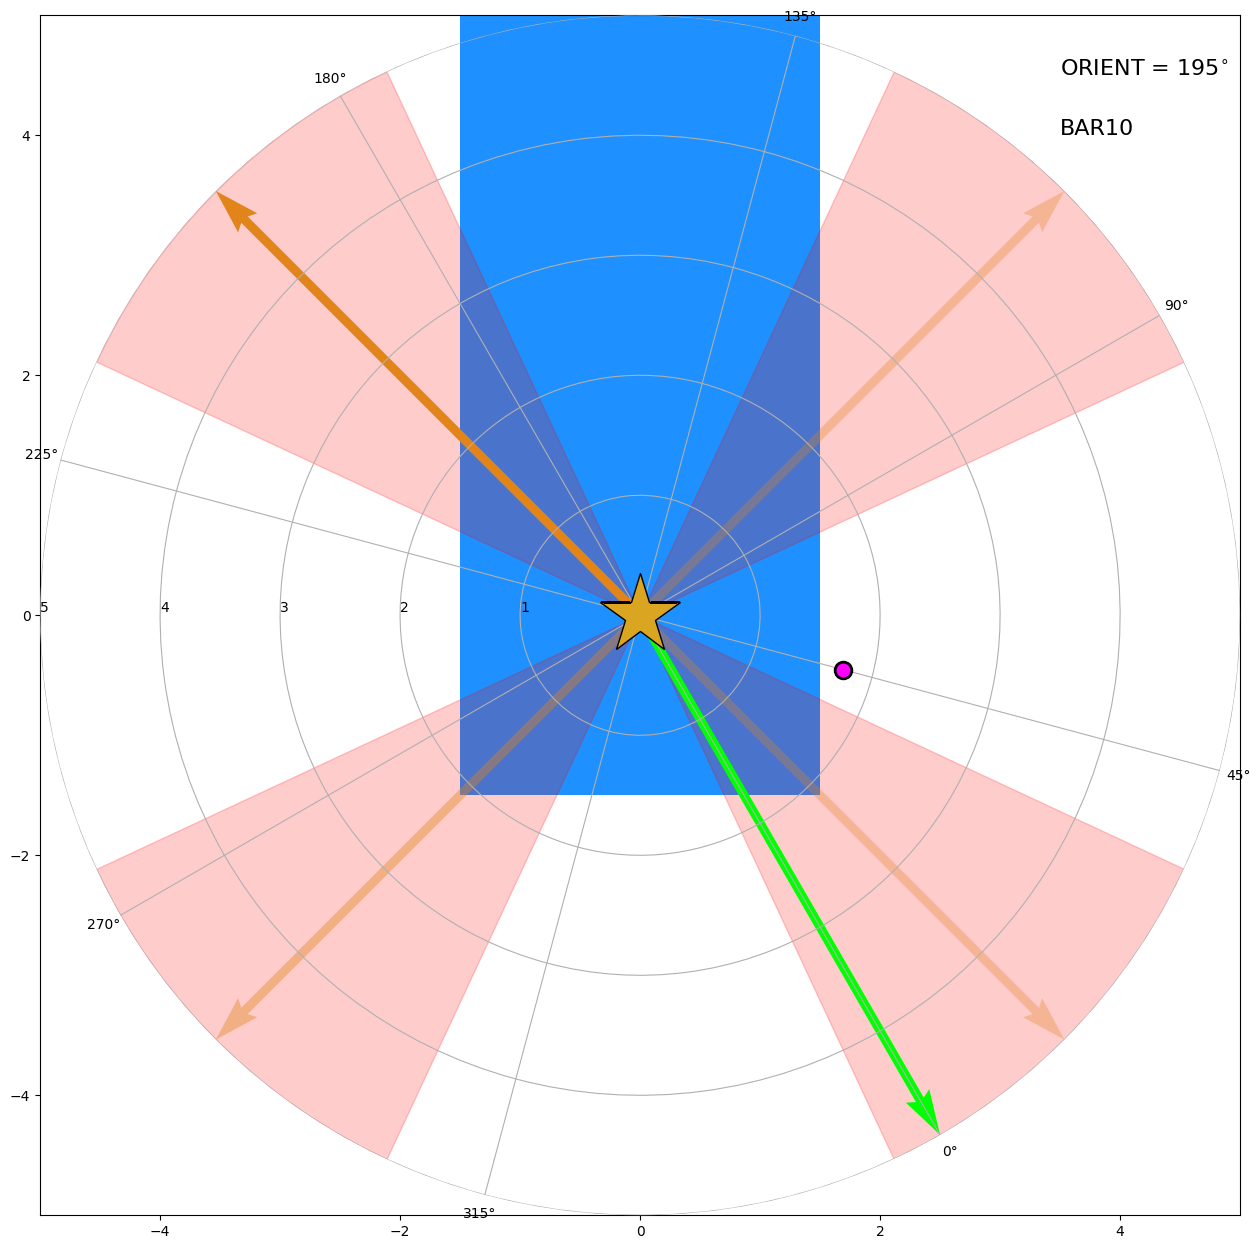

In [3]:
show_orients(orients=195, aperture='BAR10', fov=10, feature='companion', featurepa=45, featuresep=1.75)


## Example #2: Star with a companion (obscured)

### In this example, the set-up is the same as in Example #1 and the only changed parameter is the ORIENT angle, resulting in an obscured companion behind the BAR10 occulter.

Here, the configuration is virtually identical to Example #1 in terms of companion properties and occulter selection, but the ORIENT angle of the observatory has been changed from 195º in the previous example to 33º. 

At this ORIENT angle, the companion would not only lie within the diffraction spike avoidance region (red shaded area), but would also be partially obscured by the BAR10 occulter itself.

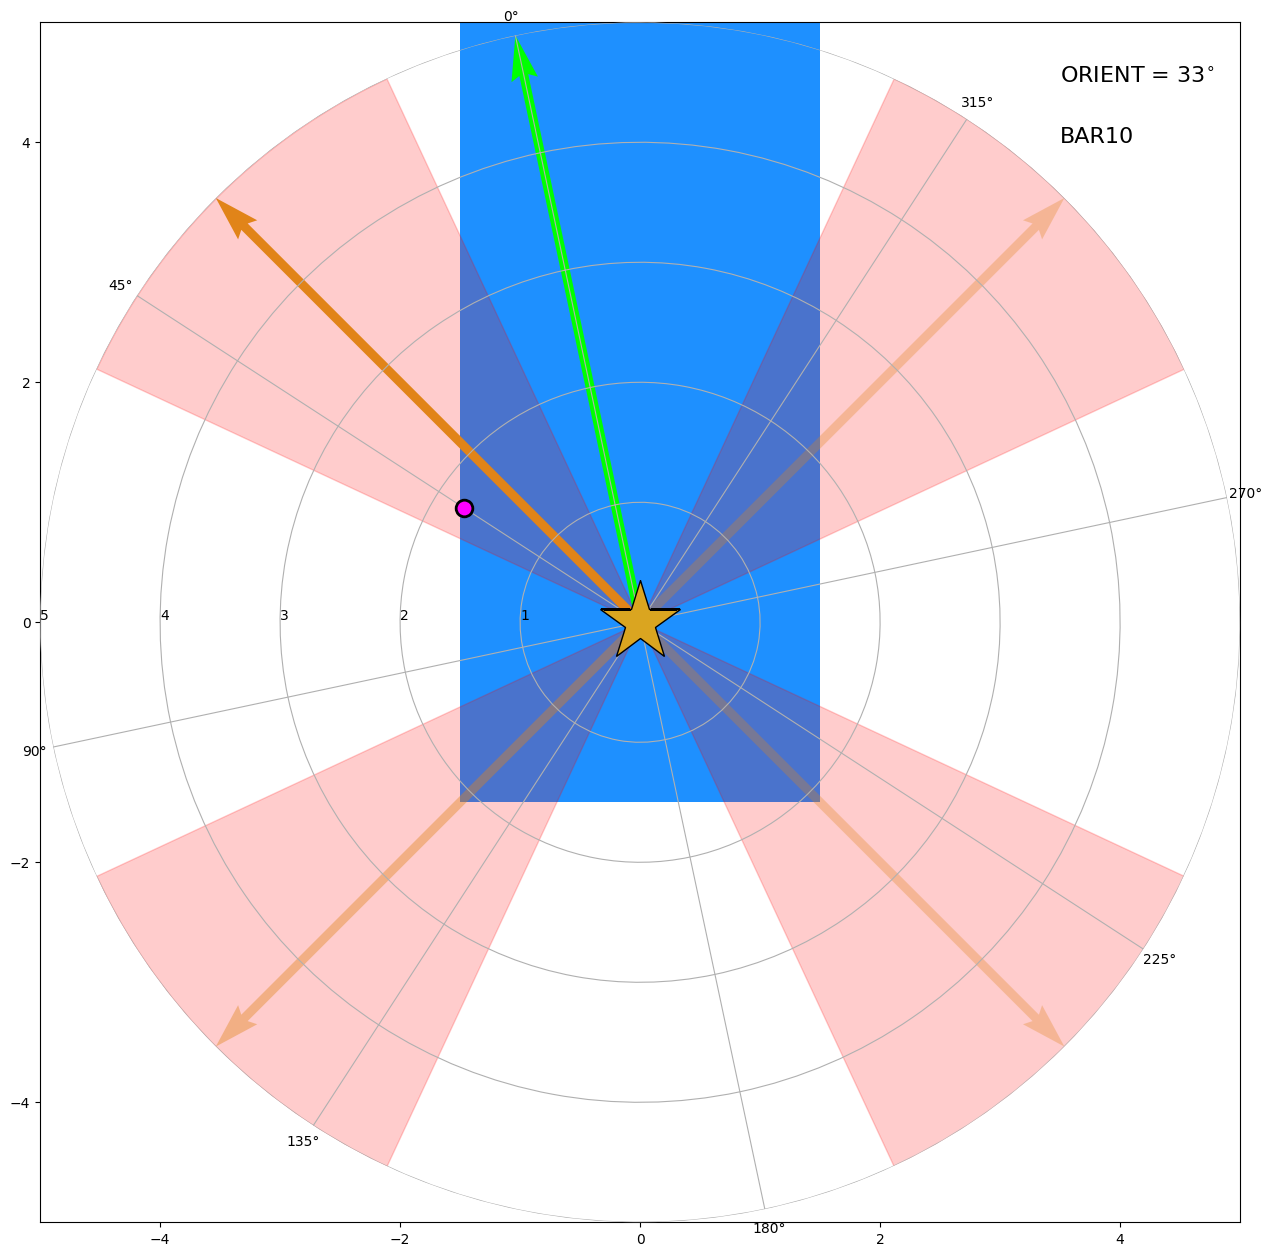

In [4]:
show_orients(orients=33, aperture='BAR10', fov=10, feature='companion', featurepa=45, featuresep=1.75)

_____
## Example #3: Star with a simple circumstellar disk 

This example shows a simple disk feature, where the central star has been placed behind the WEDGEA1.0 occulter. The selected parameters are as follows:  

* A 15”x15” field of view
* The ORIENT angle of 45º means that the true North angle (green arrow) is aligned with the detector Y-axis (AXIS2). 
* The disk has a semimajor axis of 5”, semiminor axis of 1.5", and position angle of 275º, as defined by the optional keyword arguments (disk_width = 10" and disk_height of 3")
* Zooming into the detector at this selected field of view shows both of the vertical WEDGEA and horizontal WEDGEB occulters (shown in blue), to aid in avoiding obstructions in the field of view.

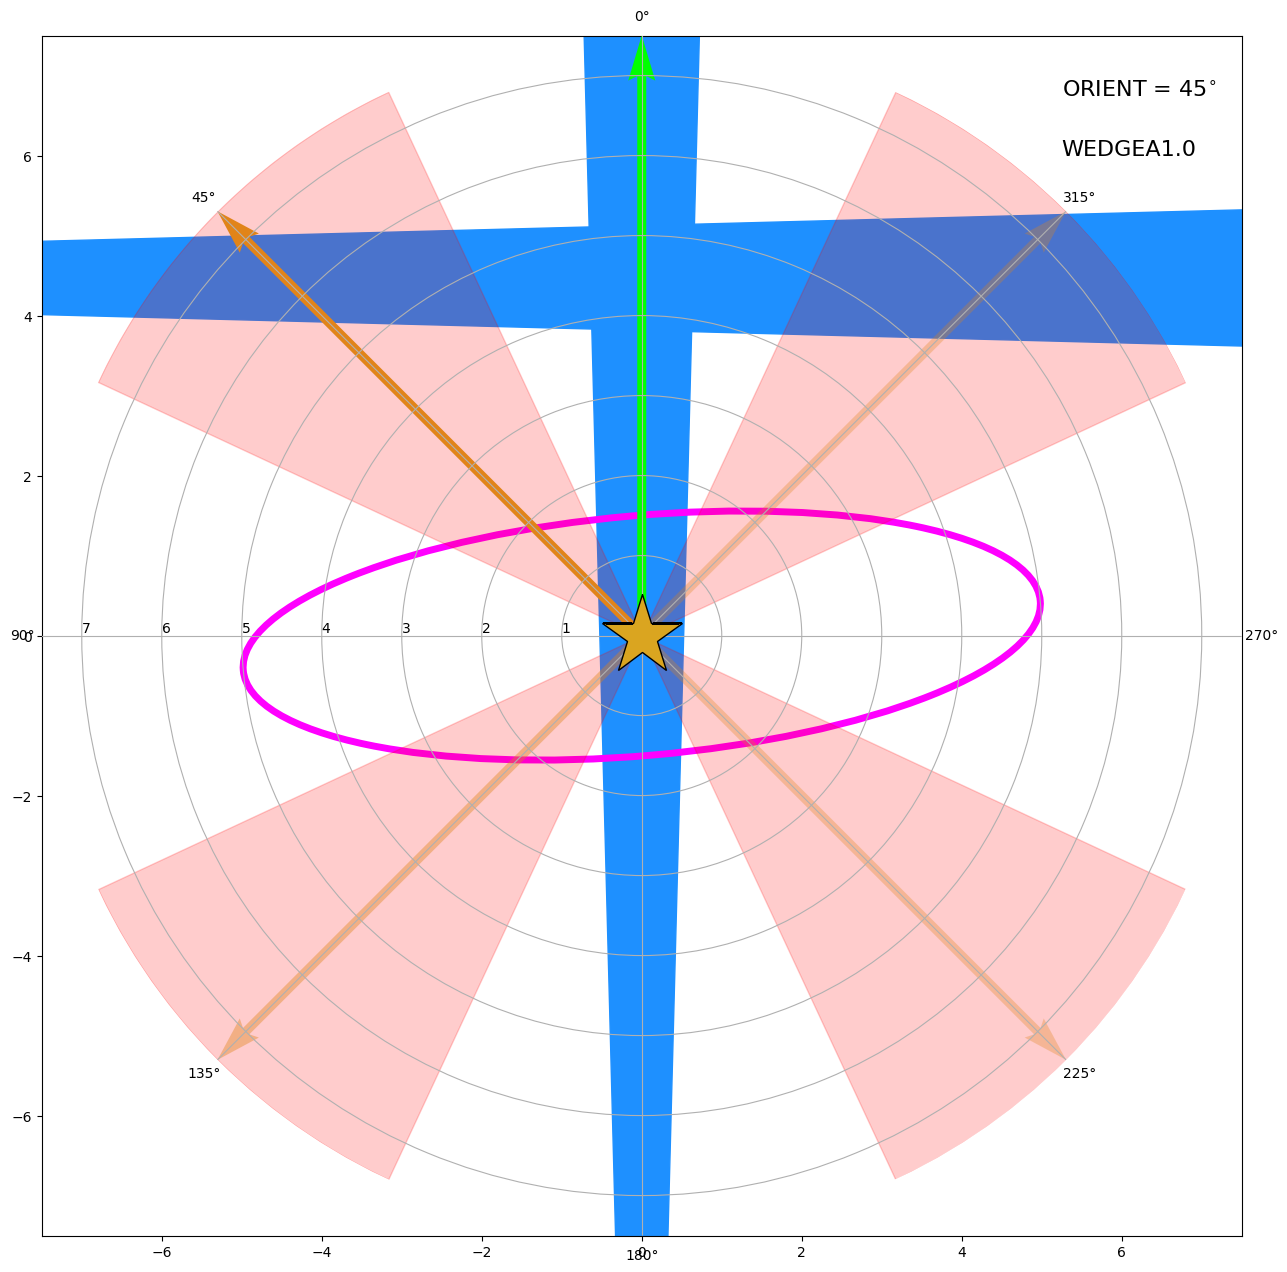

In [5]:
show_orients(orients=45, aperture='WEDGEA1.0', fov=15, feature='disk', featurepa=275, disk_width=10, disk_height=3)

_____________
[Top of Page](#header)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/> 
<br></br>
<br></br>